In [1]:
import h5py
import matplotlib.pyplot as plt
import numpy as np
import os
from tqdm import tqdm

In [2]:
TURNS = 1000
samples = 100
bounds = 0.002 # [m]

In [3]:
files = os.listdir("out/quick_scan/")

In [4]:
values = []
for f in tqdm(files):
    h5 = h5py.File(f"out/quick_scan/{f}", mode="r")
    stab = h5["stability"][:].reshape(100, 100)
    h5.close()

    plt.figure()
    plt.imshow(np.log10(stab), origin="lower", extent=[0, bounds, 0, bounds])
    plt.colorbar(label="log10(stability)")
    plt.title(f[:-3])
    plt.tight_layout()
    plt.savefig(f"img/quick_scan/{f[:-3]}.jpg")
    plt.close("all")

    s_mask = stab==TURNS
    values.append((f, np.count_nonzero(s_mask)))

  0%|          | 0/120 [00:00<?, ?it/s]/tmp/ipykernel_21837/2456080108.py:8: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(stab), origin="lower", extent=[0, bounds, 0, bounds])
100%|██████████| 120/120 [00:25<00:00,  4.79it/s]


In [8]:
sorted_vals = list(filter(lambda x: "b1" in x[0], sorted(values, key=lambda x: x[1])))
sorted_vals

element_min = sorted_vals[0][0]
element_max = sorted_vals[-1][0]
element_medium = sorted_vals[len(sorted_vals)//2][0]

/tmp/ipykernel_21837/1982189556.py:4: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(stab), origin="lower", extent=[0, bounds, 0, bounds])
/tmp/ipykernel_21837/1982189556.py:12: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(stab), origin="lower", extent=[0, bounds, 0, bounds])
/tmp/ipykernel_21837/1982189556.py:20: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(stab), origin="lower", extent=[0, bounds, 0, bounds])


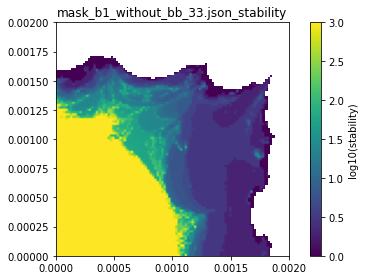

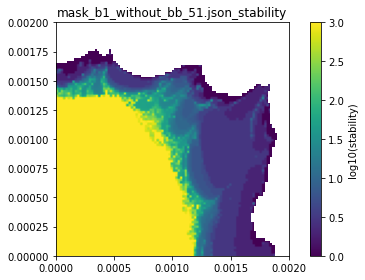

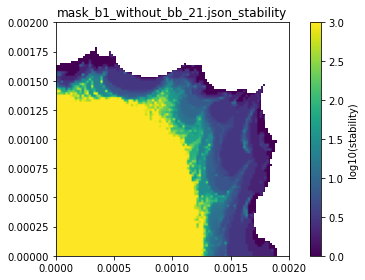

In [11]:
plt.figure()
with h5py.File(f"out/quick_scan/{element_min}", mode="r") as h5:
    stab = h5["stability"][:].reshape(100, 100)
plt.imshow(np.log10(stab), origin="lower", extent=[0, bounds, 0, bounds])
plt.colorbar(label="log10(stability)")
plt.title(element_min[:-3])
plt.tight_layout()

plt.figure()
with h5py.File(f"out/quick_scan/{element_medium}", mode="r") as h5:
    stab = h5["stability"][:].reshape(100, 100)
plt.imshow(np.log10(stab), origin="lower", extent=[0, bounds, 0, bounds])
plt.colorbar(label="log10(stability)")
plt.title(element_medium[:-3])
plt.tight_layout()

plt.figure()
with h5py.File(f"out/quick_scan/{element_max}", mode="r") as h5:
    stab = h5["stability"][:].reshape(100, 100)
plt.imshow(np.log10(stab), origin="lower", extent=[0, bounds, 0, bounds])
plt.colorbar(label="log10(stability)")
plt.title(element_max[:-3])
plt.tight_layout()

In [12]:
print("min:", element_min)
print("medium:", element_medium)
print("max:", element_max)

min: mask_b1_without_bb_33.json_stability.h5
medium: mask_b1_without_bb_51.json_stability.h5
max: mask_b1_without_bb_21.json_stability.h5


In [14]:
selected_masks = [
    "mask_b1_without_bb_33.json",
    "mask_b1_without_bb_51.json",
    "mask_b1_without_bb_21.json",
]

100%|██████████| 3/3 [00:00<00:00, 13.99it/s]


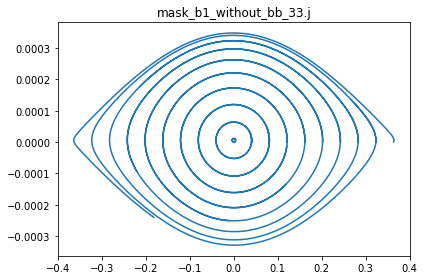

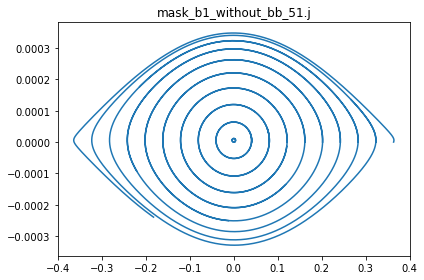

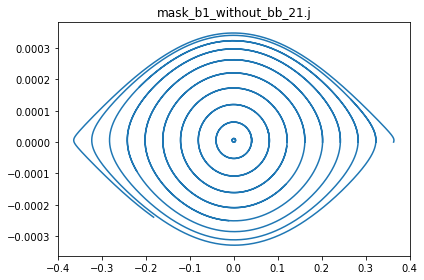

In [20]:
values = []
for f in tqdm(selected_masks):
    h5 = h5py.File(f"out/longitudinal_scan/{f[:-5]}_stability.h5", mode="r")
    zeta = h5["zeta"][:]
    delta = h5["delta"][:]
    h5.close()

    plt.figure()
    for z, d in list(zip(zeta, delta))[::10]:
        plt.plot(z, d, c="C0")
    plt.title(f[:-3])
    plt.tight_layout()
    # plt.savefig(f"img/quick_scan/{f[:-3]}.jpg")
    # plt.close("all")

In [31]:
import pickle

with open("out/time_scan.pickle", "rb") as fid:
    time_scan = pickle.load(fid)

10 samples, 10 turns: 0.2825608253479004 s, 0.0028256082534790037 s/(turn*samples)
100 samples, 10 turns: 0.27840423583984375 s, 0.00027840423583984375 s/(turn*samples)
1000 samples, 10 turns: 0.31261181831359863 s, 3.126118183135986e-05 s/(turn*samples)
10000 samples, 10 turns: 0.3040645122528076 s, 3.040645122528076e-06 s/(turn*samples)
10 samples, 100 turns: 2.597114324569702 s, 0.002597114324569702 s/(turn*samples)
100 samples, 100 turns: 2.7626659870147705 s, 0.00027626659870147707 s/(turn*samples)
1000 samples, 100 turns: 3.0295040607452393 s, 3.0295040607452392e-05 s/(turn*samples)
10000 samples, 100 turns: 3.0285346508026123 s, 3.0285346508026124e-06 s/(turn*samples)
10 samples, 1000 turns: 25.963598489761353 s, 0.0025963598489761354 s/(turn*samples)
100 samples, 1000 turns: 27.612834692001343 s, 0.00027612834692001344 s/(turn*samples)
1000 samples, 1000 turns: 30.09770631790161 s, 3.009770631790161e-05 s/(turn*samples)
10000 samples, 1000 turns: 30.28639841079712 s, 3.02863984

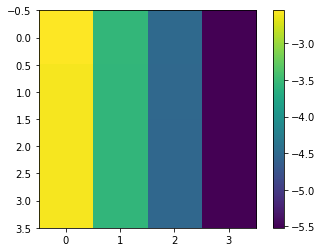

In [34]:
normed_times = np.array([t / (s * n) for s, n, t in time_scan])

for t, nt in zip(time_scan, normed_times):
    print(f"{t[0]} samples, {t[1]} turns: {t[2]} s, {nt} s/(turn*samples)")

plt.imshow(np.log10(normed_times).reshape(4,4))
plt.colorbar()

In [35]:
t_value = 3.029046003818512e-06

In [41]:
seconds = int(t_value * (300 * 300) * 1e5)
# print hours:minutes:seconds
print(f"{seconds // 3600}:{(seconds % 3600) // 60}:{seconds % 60}")

8:24:50


In [46]:
np.logspace(1, 5, 53, dtype=int)

array([    10,     11,     14,     17,     20,     24,     28,     34,
           41,     49,     58,     70,     83,    100,    119,    142,
          170,    203,    242,    289,    345,    412,    492,    587,
          701,    837,   1000,   1193,   1425,   1701,   2030,   2424,
         2894,   3455,   4124,   4923,   5878,   7017,   8376,  10000,
        11937,  14251,  17012,  20309,  24244,  28942,  34551,  41246,
        49238,  58780,  70170,  83767, 100000])